##  (Squad AM) Projeto Oficial 

### Trens e Metrôs de SP

In [1]:
# Importando Bibliotecas
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# importando o csv em um Pandas DataFrame
dados = pd.read_csv('csvs/metroetrem_sp_comlinks.csv')

In [17]:
# visão geral do DF
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 17
Data columns (total 6 columns):
num_lin        197 non-null int64
nome_lin       197 non-null object
long           197 non-null int64
lat            197 non-null int64
estacao_upp    197 non-null object
link           197 non-null object
dtypes: int64(3), object(3)
memory usage: 10.8+ KB


In [18]:
# primeiras cinco linhas do DF
dados.head()

,num_lin,nome_lin,long,lat,estacao_upp,link
0,4,AMARELA,-46723768,-23586440,SAO PAULO MORUMBI,BUTANTA
1,4,AMARELA,-46708157,-23571857,BUTANTA,PINHEIROS
2,4,AMARELA,-46701610,-23567392,PINHEIROS,FARIA LIMA
3,4,AMARELA,-46694102,-23567269,FARIA LIMA,FRADIQUE COUTINHO
4,4,AMARELA,-46684259,-23566228,FRADIQUE COUTINHO,OSCAR FREIRE


### Gerando os Grafos:

In [19]:
grafos_dict = dict()
# dicionário para armazenar os grafos por linha de metro/trem

for linha in dados['nome_lin'].unique():
    # para cada linha (ex: amarela, verde, etc...)
    
    G = nx.Graph()
    df_temp = dados[dados['nome_lin'] == linha]
    # dataframe temporário exclusivo para cada linha de metro/trem
    
    for id, row in df_temp.iterrows():
        G.add_node(row['estacao_upp'], location=(row['long'], row['lat']))
        # add nodes com informação de longitude e latitude
    
    for id,row in df_temp.iterrows():
        G.add_edge(row['estacao_upp'], row['link'], linha=row['nome_lin'])
        # add vértices com informação do nome da linha
    
    grafos_dict[linha] = G
    # adicionando cada grafo no dicionário (grafos_dict)

In [20]:
# checando as chaves do dicionário pra ver se o processo deu certo
grafos_dict.keys()

dict_keys(['AMARELA', 'AZUL', 'CORAL', 'DIAMANTE', 'ESMERALDA', 'JADE', 'LILAS', 'PRATA', 'RUBI', 'SAFIRA', 'TURQUESA', 'VERDE', 'VERMELHA'])

### Plotando os Grafos

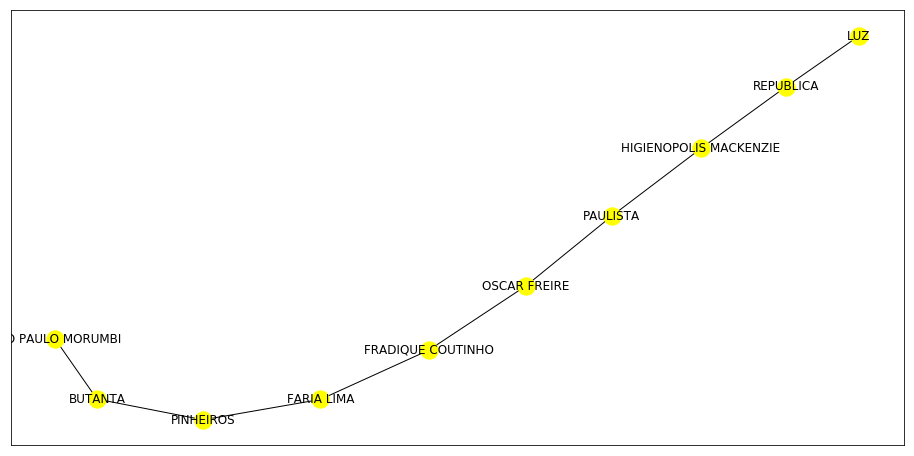

In [36]:
linha_target = 'AMARELA'
# variável para deixar o código mais genérico

nx.draw_networkx(grafos_dict[linha_target], node_color='yellow')
# plotando o grafo

plt.rcParams['figure.figsize'] = [16, 8]
# escolhendo o tamanho do grafo

# Plotar o Grafo Completo

# Pesos?

# Função de Percurso

# Interface